In [1]:
import time
import rsa
import numpy as np
import matplotlib.pyplot as plt
import generate_key as key

In [2]:
start = 5
end = 31

In [3]:
text = 'h'
decrypt_time = []
for i in range(start, end + 1):
    (e, n), (d, n) = key.generate_key(i)
    encoded = rsa.encode(text)
    encrypted = rsa.group_encrypt(encoded, e, n)
    decrypted = rsa.group_decrypt(encrypted, d, n) # real decryption
    decoded = rsa.decode(decrypted)
    #-----------------Attack-----------------
    start = time.time()
    d_init = 1
    # if(e < d): d_init = e
    # else: d_init = d // 10 
    print(f"e: {e}, d: {d}, d_init: {d_init}")
    while decrypted != rsa.group_decrypt(encrypted, d_init, n):
        d_init += 1
    end = time.time()
    print(f"Execution time: {round(end - start, 4)} seconds , i = {i}")
    decrypt_time.append(round(end - start, 4))
    #----------------------------------------

e: 19, d: 79, d_init: 1
Execution time: 0.0 seconds , i = 4
e: 49, d: 97, d_init: 1
Execution time: 0.0 seconds , i = 5
e: 417, d: 65, d_init: 1
Execution time: 0.0 seconds , i = 6
e: 227, d: 75, d_init: 1
Execution time: 0.0 seconds , i = 7
e: 2203, d: 1159, d_init: 1
Execution time: 0.0 seconds , i = 8
e: 513, d: 401, d_init: 1
Execution time: 0.0 seconds , i = 9
e: 1441, d: 5501, d_init: 1
Execution time: 0.003 seconds , i = 10
e: 9823, d: 9871, d_init: 1
Execution time: 0.0117 seconds , i = 11
e: 15559, d: 11539, d_init: 1
Execution time: 0.003 seconds , i = 12
e: 12917, d: 12053, d_init: 1
Execution time: 0.001 seconds , i = 13
e: 32833, d: 150337, d_init: 1
Execution time: 0.1238 seconds , i = 14
e: 71539, d: 115339, d_init: 1
Execution time: 0.005 seconds , i = 15
e: 531377, d: 41153, d_init: 1
Execution time: 0.0659 seconds , i = 16
e: 129961, d: 334441, d_init: 1
Execution time: 0.0009 seconds , i = 17
e: 239587, d: 594107, d_init: 1
Execution time: 1.2132 seconds , i = 18
e: 

KeyboardInterrupt: 

In [4]:
print(decrypt_time)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003, 0.0117, 0.003, 0.001, 0.1238, 0.005, 0.0659, 0.0009, 1.2132, 0.1125, 0.5813, 3.3264, 0.523, 15.6036, 8.8305, 17.5737, 101.3579]


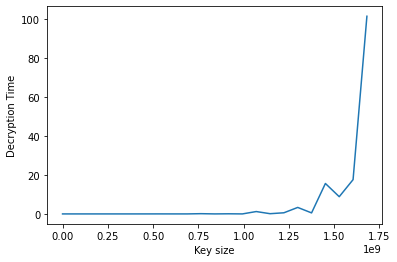

In [5]:

x = np.linspace(0, end, len(decrypt_time))
plt.figure(facecolor='w')
plt.plot(x,decrypt_time)
plt.xlabel('Key size')
plt.ylabel('Decryption Time')
plt.show()